# COVID_Analysis

In [1]:
from urllib.request import urlretrieve

In [2]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7f87a3431e50>)

In [3]:
import pandas as pd

In [4]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [5]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Get basic information through methods below.

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [7]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [8]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [9]:
covid_df.shape

(248, 4)

Here's a summary of the functions & methods we've looked at so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple

## Retrieving data from df

In [11]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using a data structure called `Series`

In [12]:
covid_df['new_cases'][246]

975.0

Pandas also provides the `.at` method to retrieve the element at a specific row & column directly.

In [13]:
covid_df.at[246, 'new_cases']

975.0

Pandas also allows accessing columns as properties of the dataframe using the `.` notation. However, this method only works for columns whose names do not contain spaces or special characters.

pass a list of columns within the indexing notation `[]` to access a subset of the df with just the given columns.

In [15]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


Copy the full df to manipulate and analyse

In [17]:
covid_df_copy = covid_df.copy()

To access a specific row of data, Pandas provides the `.loc` method.

In [18]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

We can use the `.head` and `.tail` methods to view the first or last few rows of data.

In [19]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


NaN means not a number 

pass range to `loc`

In [20]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


`.sample` to retrieve a random sample from df

In [21]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
34,2020-02-03,0.0,0.0,NaN
64,2020-03-04,466.0,28.0,NaN
163,2020-06-11,202.0,71.0,32991.0
19,2020-01-19,0.0,0.0,NaN
152,2020-05-31,416.0,111.0,28948.0
2,2020-01-02,0.0,0.0,NaN
156,2020-06-04,321.0,71.0,27451.0
157,2020-06-05,177.0,88.0,40470.0
231,2020-08-18,320.0,4.0,32687.0
123,2020-05-02,1965.0,269.0,31231.0


Here's a summary of the functions & methods we looked at in this section:

- `covid_df['new_cases']` - Retrieving columns as a `Series` using the column name
- `new_cases[243]` - Retrieving values from a `Series` using an index
- `covid_df.at[243, 'new_cases']` - Retrieving a single value from a data frame
- `covid_df.copy()` - Creating a deep copy of a data frame
- `covid_df.loc[243]` - Retrieving a row or range of rows of data from the data frame
- `head`, `tail`, and `sample` - Retrieving multiple rows of data from the data frame
- `covid_df.new_tests.first_valid_index` - Finding the first non-empty index in a series


## Analyse data from df

Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?

Similar to Numpy arrays, a Pandas series supports the sum method to answer these questions

In [23]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

**Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [24]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [25]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**

In [26]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [27]:
total_tests

5214766.0

**Q: What fraction of tests returned a positive result?**

In [28]:
positive_rate = total_cases / total_tests

In [29]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


## Querying and sorting rows

In [30]:
high_new_cases = covid_df.new_cases > 1000

In [31]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [32]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Write in 1 line

In [33]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [34]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Only the first & last five rows are displayed by default with Jupyter for brevity. Change some display options to view all the rows.

In [35]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [36]:
positive_rate

0.05206657403227681

sub-df of days that positive_rate is higher than average

In [37]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [38]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


We can use this series to add a new column to the data frame.

In [50]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [51]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


It's not good to calculate the new_cases / new_tests on the same day, since there's a lag between the two.
Use `drop` method to remove the column.

In [52]:
covid_df.drop(columns=['positive_rate'], inplace=False)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


`inplace = True` does not return result.

### Sorting rows using column values

In [53]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
82,2020-03-22,6557.0,795.0,NaN,NaN
87,2020-03-27,6153.0,660.0,NaN,NaN
81,2020-03-21,5986.0,625.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
88,2020-03-28,5959.0,971.0,NaN,NaN
83,2020-03-23,5560.0,649.0,NaN,NaN
80,2020-03-20,5322.0,429.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
86,2020-03-26,5210.0,685.0,NaN,NaN


In [54]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
88,2020-03-28,5959.0,971.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
92,2020-04-01,4053.0,839.0,NaN,NaN
91,2020-03-31,4050.0,810.0,NaN,NaN
82,2020-03-22,6557.0,795.0,NaN,NaN
95,2020-04-04,4585.0,764.0,NaN,NaN
94,2020-04-03,4668.0,760.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
93,2020-04-02,4782.0,727.0,NaN,NaN


Based on the analysis here, deaths peak arrives 1 week after cases peak.

In [55]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests,positive_rate
172,2020-06-20,-148.0,47.0,29875.0,-0.004954
0,2019-12-31,0.0,0.0,NaN,NaN
29,2020-01-29,0.0,0.0,NaN,NaN
30,2020-01-30,0.0,0.0,NaN,NaN
32,2020-02-01,0.0,0.0,NaN,NaN
33,2020-02-02,0.0,0.0,NaN,NaN
34,2020-02-03,0.0,0.0,NaN,NaN
36,2020-02-05,0.0,0.0,NaN,NaN
37,2020-02-06,0.0,0.0,NaN,NaN
38,2020-02-07,0.0,0.0,NaN,NaN


In ascending order, -148 orcurs as a correction. 

For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:
1. Replace it with `0`.
2. Replace it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely

Approach 3 looks good. 
You can use the `.at` method to modify a specific value within the dataframe.

In [56]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

Here's a summary of the functions & methods we looked at in this section:

- `covid_df.new_cases.sum()` - Computing the sum of values in a column or series
- `covid_df[covid_df.new_cases > 1000]` - Querying a subset of rows satisfying the chosen criteria using boolean expressions
- `df['pos_rate'] = df.new_cases/df.new_tests` - Adding new columns by combining data from existing columns
- `covid_df.drop('positive_rate')` - Removing one or more columns from the data frame
- `sort_values` - Sorting the rows of a data frame using column values
- `covid_df.at[172, 'new_cases'] = ...` - Replacing a value within the data frame

## Working with dates

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [58]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [59]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

Extract data from date to different columns by `.DatatimeIndex`

In [60]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [61]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2


Now, check metrics for May.

In [62]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [63]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [64]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Combine into 1 line

In [65]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Compare Sunday cases and avergae cases.

In [66]:
# Overall average
covid_df.new_cases.mean()

1096.6149193548388

In [67]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

## Grouping and aggregation

Group daily data to monthly data, use `.groupby` method.
Aggregate with `.sum` method

In [73]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [74]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


Grouping and aggregation helps summarize data into small df.

`.mean` can also aggregate data. 

In [75]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [76]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Use `.cumsum()` method to aggregate 

In [78]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [79]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [80]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

In [81]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,35491.0,NaN


## Merging data from multiple sources

To determine other metrics including tests per million, cases per million. We need info about countries, populations, etc. Download `locations.csv`.

In [82]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7f87a4b528b0>)

In [83]:
locations_df = pd.read_csv('locations.csv')

In [85]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


Italy cases are under investigations  

In [86]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


A common shared column is required to merge 2 dfs. Create a `location` column in covid_df

In [89]:
covid_df['location'] = 'Italy'

In [90]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [91]:
merged_df = covid_df.merge(locations_df, on = 'location')

In [92]:
merged_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


Since only Italy is under investigation, other location data are not merged. 
Now can calculate metrics such as cases per million

In [93]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [94]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [95]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [96]:
merged_df

,date,new_cases,new_deaths,new_tests,positive_rate,year,month,day,weekday,total_cases,...,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,...,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,...,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,...,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


## Writing data back to files

Write results to a new file. 

In [97]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [98]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


In [99]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(result_df[result_df.new_cases > 1000])

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
68,2020-03-08,1247.0,5883.0,36.0,233.0,NaN,NaN,97.301061,3.853671,NaN
69,2020-03-09,1492.0,7375.0,133.0,366.0,NaN,NaN,121.977787,6.053406,NaN
70,2020-03-10,1797.0,9172.0,98.0,464.0,NaN,NaN,151.699019,7.674264,NaN
72,2020-03-12,2313.0,12462.0,196.0,827.0,NaN,NaN,206.113517,13.678052,NaN
73,2020-03-13,2651.0,15113.0,189.0,1016.0,NaN,NaN,249.959363,16.803991,NaN
74,2020-03-14,2547.0,17660.0,252.0,1268.0,NaN,NaN,292.085115,20.971910,NaN
75,2020-03-15,3497.0,21157.0,173.0,1441.0,NaN,NaN,349.923261,23.833219,NaN
76,2020-03-16,2823.0,23980.0,370.0,1811.0,NaN,NaN,396.613877,29.952783,NaN
77,2020-03-17,4000.0,27980.0,347.0,2158.0,NaN,NaN,462.771321,35.691941,NaN
78,2020-03-18,3526.0,31506.0,347.0,2505.0,NaN,NaN,521.089108,41.431099,NaN


To write the data from the df into a file, use the `to_csv` function. 

In [100]:
result_df.to_csv('results.csv', index=None)

The `to_csv` function also includes an additional column for storing the index of the dataframe by default. We pass `index=None` to turn off this behavior. You can now verify that the `results.csv` is created and contains data from the data frame in CSV format:

```
date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
2020-02-27,78.0,400.0,1.0,12.0,,,6.61574439992122,0.1984723319976366,
2020-02-28,250.0,650.0,5.0,17.0,,,10.750584649871982,0.28116913699665186,
2020-02-29,238.0,888.0,4.0,21.0,,,14.686952567825108,0.34732658099586405,
2020-03-01,240.0,1128.0,8.0,29.0,,,18.656399207777838,0.47964146899428844,
2020-03-02,561.0,1689.0,6.0,35.0,,,27.93498072866735,0.5788776349931067,
2020-03-03,347.0,2036.0,17.0,52.0,,,33.67413899559901,0.8600467719897585,
...
```

## Basic plotting with Pandas

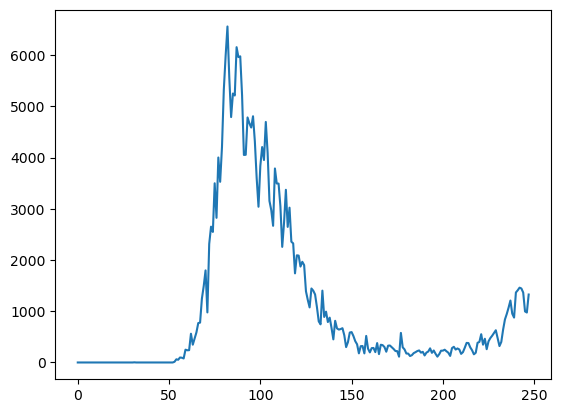

In [102]:
result_df.new_cases.plot();

Use `date` as the index, so x-axis can be clearer on graph.

In [103]:
result_df.set_index('date', inplace=True)

In [104]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


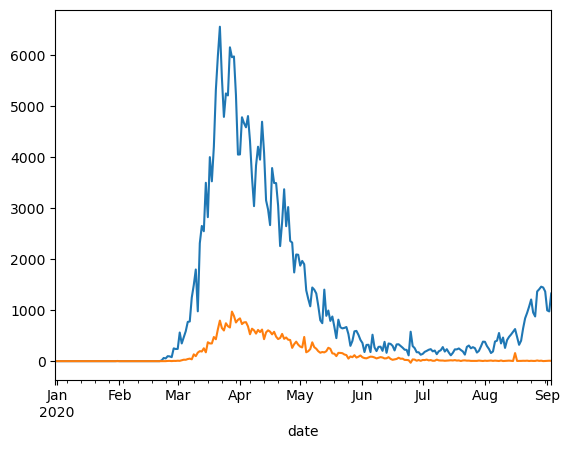

In [107]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

In [108]:
death_rate = result_df.total_deaths / result_df.total_cases

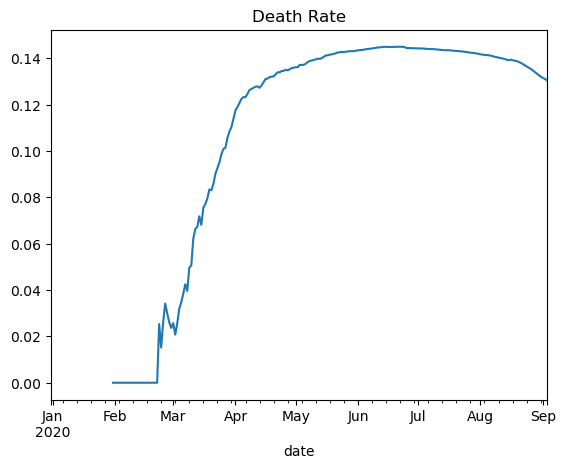

In [109]:
death_rate.plot(title='Death Rate');

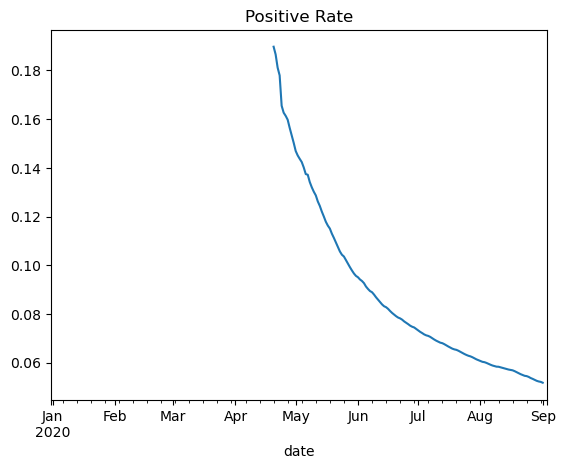

In [110]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

Monthly data are at a higher level.

<AxesSubplot:title={'center':'Monthly new cases'}, xlabel='month'>

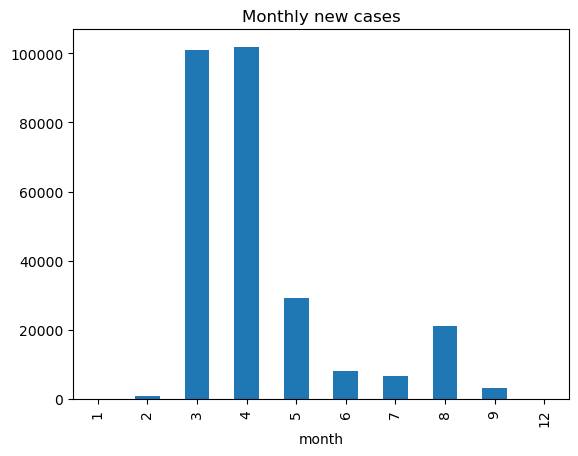

In [111]:
covid_month_df.new_cases.plot(title = "Monthly new cases", kind = "bar")

Note: `shift` + `tab` to see explantions for a method or function

<AxesSubplot:title={'center':'Monthly new cases'}, xlabel='month'>

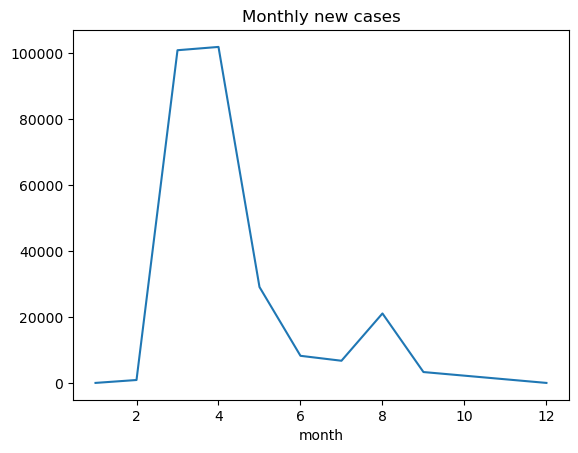

In [112]:
covid_month_df.new_cases.plot(title = "Monthly new cases")